### TELECOM CHURN CASE STUDY
With 21 independent variables we will be predicting whether the particular customer will switch to a another telecom operator or not.

In [1]:
#IMPORTING THE NECESSARY LIBRARIES
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
churn_data=pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data=pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_data=pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
# Merging the first two columns
df_1=pd.merge(churn_data,customer_data,how="inner",on="customerID")

In [6]:
# Merging the final columns
telecom=pd.merge(df_1,internet_data,how="inner",on="customerID")

In [7]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
telecom.shape

(7043, 21)

In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [10]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
var_=["PhoneService","PaperlessBilling","Churn","Partner","Dependents"]

In [12]:
telecom[var_]=telecom[var_].apply(lambda x:x.map({"Yes":1,"No":0}))

In [13]:
telecom[var_]

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,0,1,0,1,0
1,1,0,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,0,0
...,...,...,...,...,...
7038,1,1,0,1,1
7039,1,1,0,1,1
7040,0,1,0,1,1
7041,1,1,1,1,0


In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [15]:
Dum=pd.get_dummies(telecom[["Contract","PaymentMethod","gender","InternetService"]],drop_first=True)

In [16]:
Dum

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
7038,1,0,0,0,1,1,0,0
7039,1,0,1,0,0,0,1,0
7040,0,0,0,1,0,0,0,0
7041,0,0,0,0,1,1,1,0


In [17]:
telecom=pd.concat([telecom,Dum],axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [19]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [20]:
telecom['MultipleLines']

0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object

In [21]:
telecom['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [22]:
telecom['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [23]:
telecom['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [24]:
telecom['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [25]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'

m1=pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
ml1=m1.drop(['MultipleLines_No phone service'],1)
telecom=pd.concat([telecom,ml1],axis=1)

m2=pd.get_dummies(telecom["OnlineSecurity"],prefix="OnlineSecurity")
ml2=m2.drop(["OnlineSecurity_No internet service"],1)
telecom=pd.concat([telecom,ml2],axis=1)

m3=pd.get_dummies(telecom["OnlineBackup"],prefix="OnlineBackup")
ml3=m3.drop(["OnlineBackup_No internet service"],1)
telecom=pd.concat([telecom,ml3],axis=1)

m4=pd.get_dummies(telecom["DeviceProtection"],prefix="DeviceProtection")
ml4=m4.drop(["DeviceProtection_No internet service"],1)
telecom=pd.concat([telecom,ml4],axis=1)

m5=pd.get_dummies(telecom["TechSupport"],prefix="TechSupport")
ml5=m5.drop(["TechSupport_No internet service"],1)
telecom=pd.concat([telecom,ml5],axis=1)

m6=pd.get_dummies(telecom["StreamingTV"],prefix="StreamingTV")
ml6=m6.drop(["StreamingTV_No internet service"],1)
telecom=pd.concat([telecom,m6],axis=1)

m7=pd.get_dummies(telecom["StreamingMovies"],prefix="StreamingMovies")
ml7=m7.drop(["StreamingMovies_No internet service"],1)
telecom=pd.concat([telecom,m7],axis=1)

In [26]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,1,0,1,0,0,1,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,1,0,1,0,0,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,1,0,1,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,0,1,1,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,0,1,0,0


In [27]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],


In [28]:
telecom=telecom.drop(['Contract','PaymentMethod','gender','InternetService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],1)

In [29]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [30]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [31]:
telecom['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [32]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0


In [33]:
num_col=telecom[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']]

In [34]:
num_col.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
90%,69.000000,102.600000,5976.640000,1.000000
95%,72.000000,107.400000,6923.590000,1.000000
99%,72.000000,114.729000,8039.883000,1.000000


In [35]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [36]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [37]:
telecom=telecom[~np.isnan(telecom["TotalCharges"])]

In [38]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Segregating the dependent and independent variables
X=telecom.drop(["Churn","customerID"],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,0,1,1,0,1,0,0,1,0,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,0,1,0,1,1,0,0,1,0,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0


In [41]:
y=telecom["Churn"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [42]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

### FEATURE SCALING

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
X_train[["tenure","MonthlyCharges","TotalCharges"]]=scaler.fit_transform(X_train[["tenure","MonthlyCharges","TotalCharges"]])

In [46]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1


In [47]:
sum(telecom["Churn"])/len(telecom["Churn"])*100

26.578498293515356

### LOOKING AT CORELATIONS

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

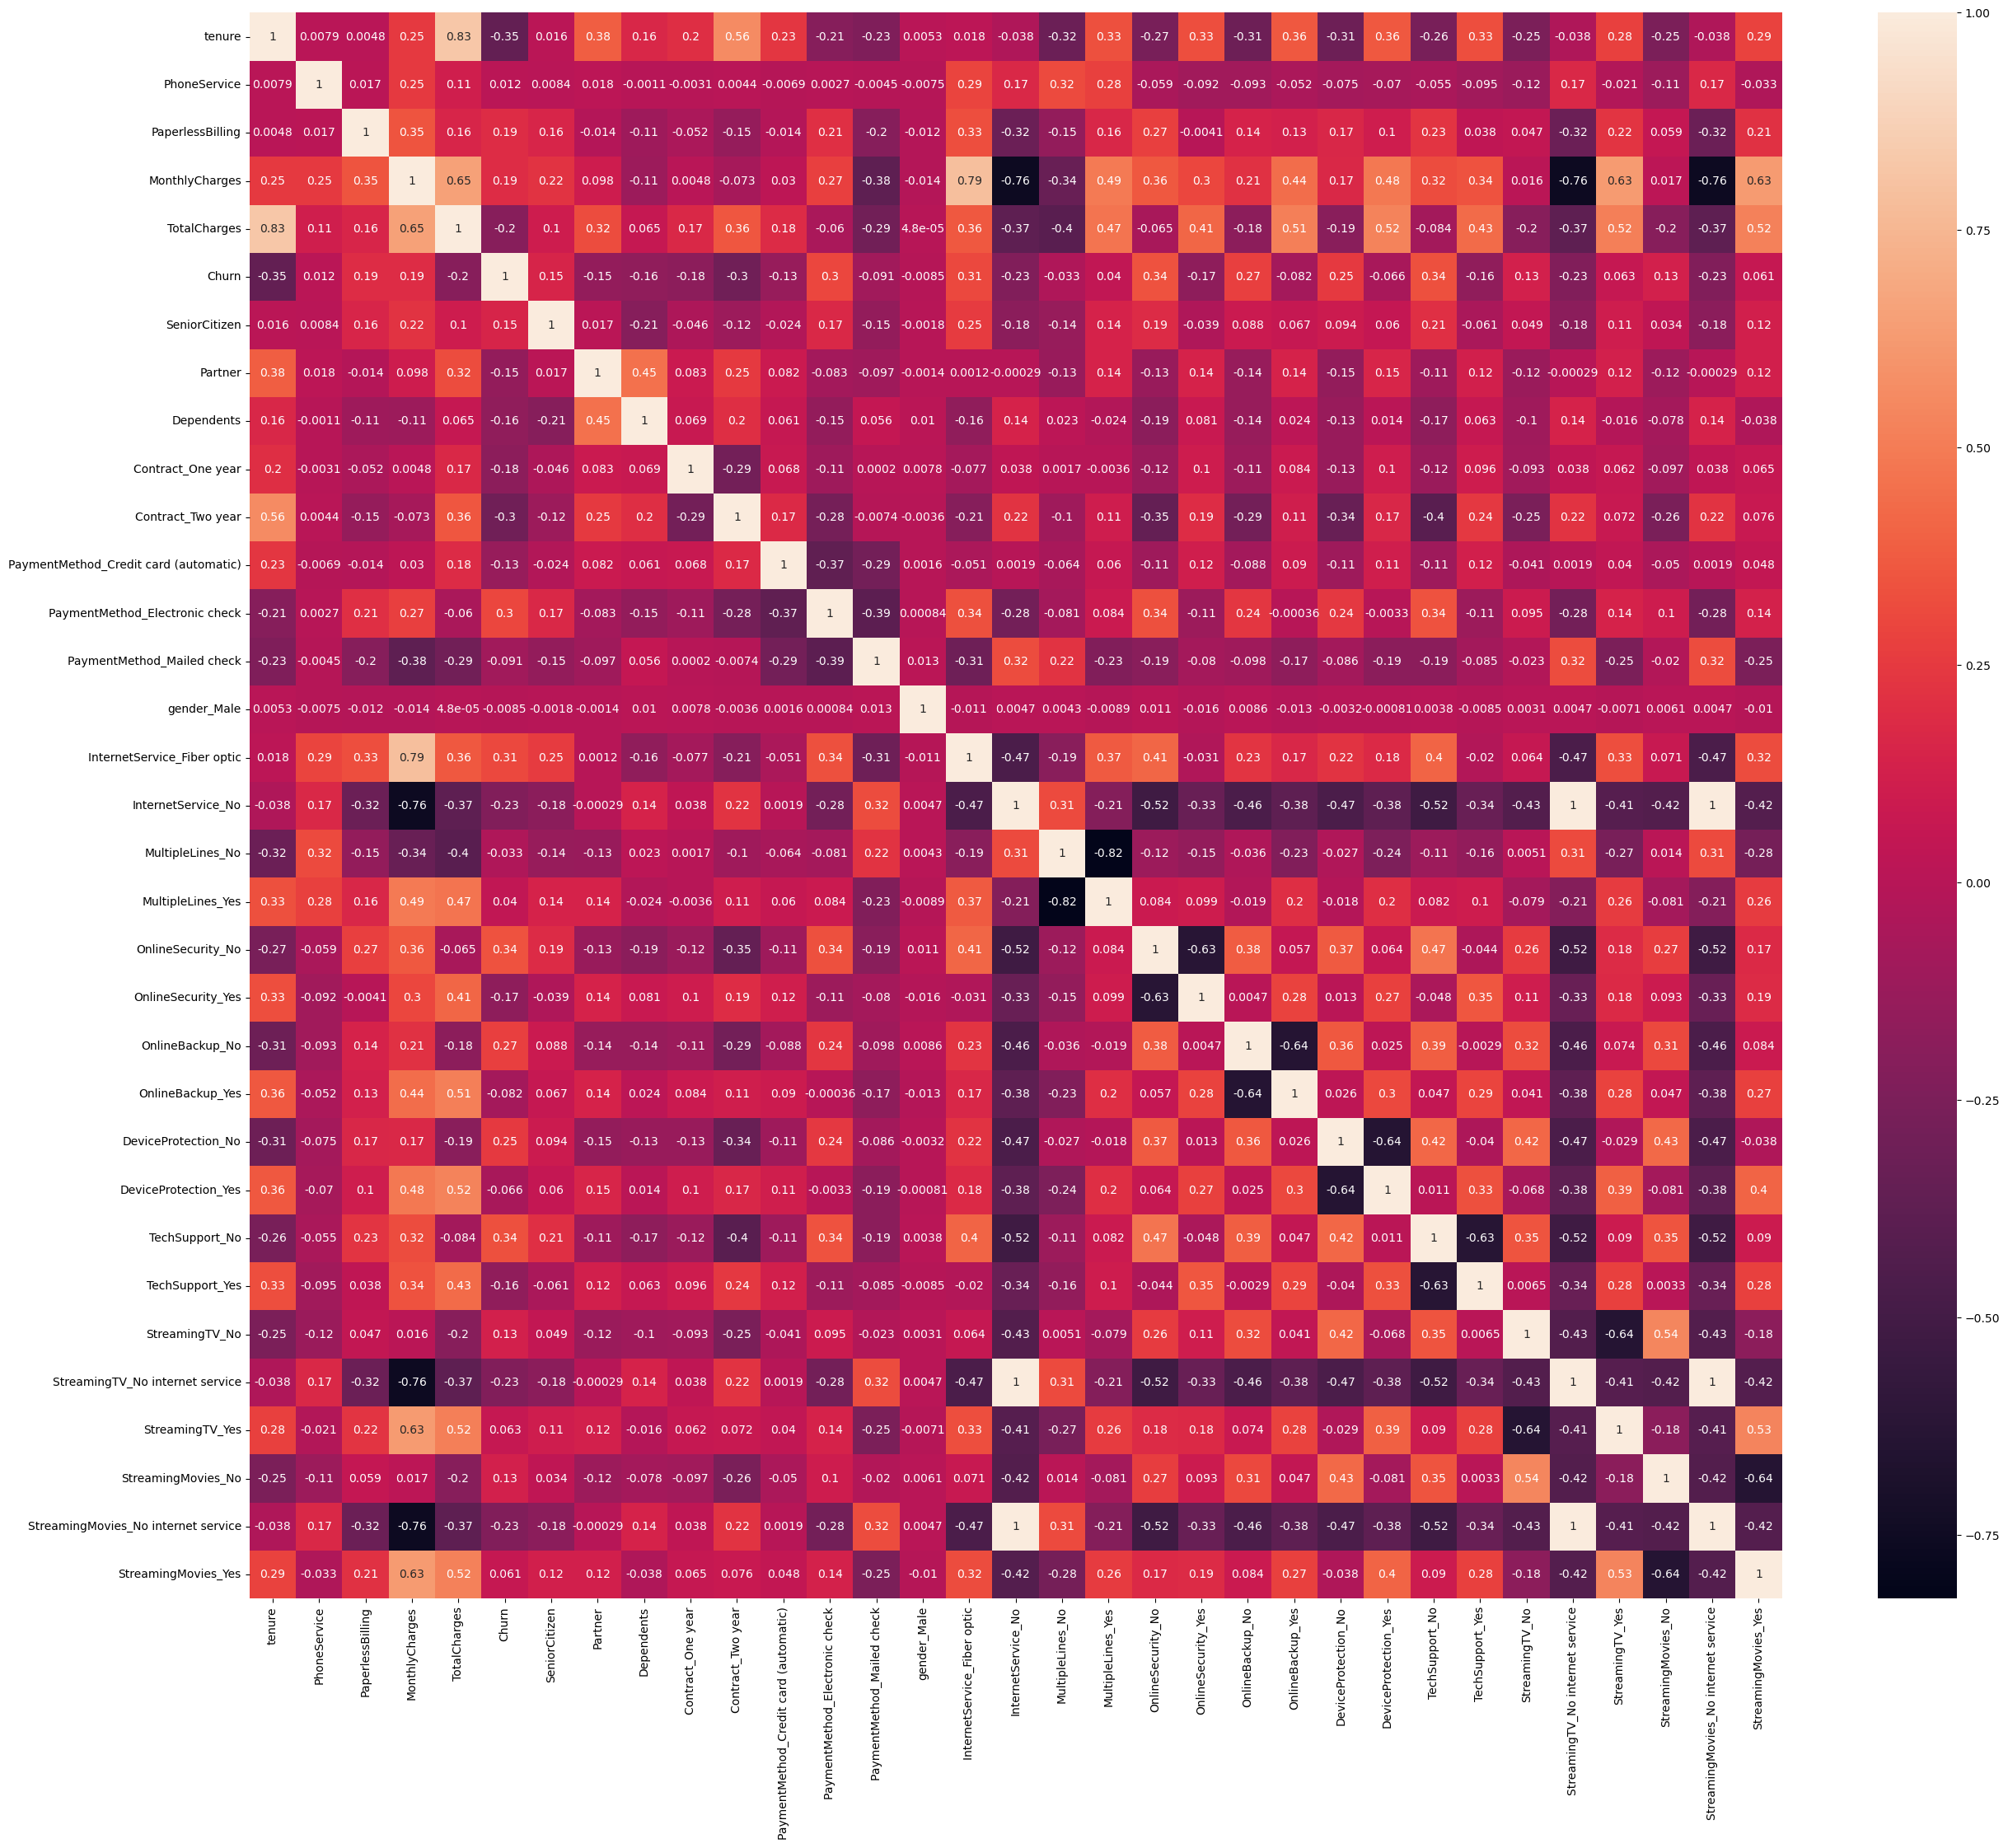

In [49]:
plt.figure(figsize=[30,25])
sns.heatmap(telecom.corr(),annot=True)
plt.show()

In [50]:
telecom.corr()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,0.015683,0.381912,0.163386,0.202338,...,-0.314820,0.361520,-0.264363,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402
PhoneService,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,0.008392,0.018397,-0.001078,-0.003142,...,-0.075421,-0.070076,-0.055102,-0.095138,-0.123159,0.171817,-0.021383,-0.111273,0.171817,-0.033477
PaperlessBilling,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,0.156258,-0.013957,-0.110131,-0.052278,...,0.166253,0.104079,0.229875,0.037536,0.046715,-0.320592,0.224241,0.058987,-0.320592,0.211583
MonthlyCharges,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,0.219874,0.097825,-0.112343,0.004810,...,0.171057,0.482607,0.321267,0.338301,0.016015,-0.763191,0.629668,0.017271,-0.763191,0.627235
TotalCharges,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,0.102411,0.319072,0.064653,0.170569,...,-0.189485,0.522881,-0.084270,0.432868,-0.197144,-0.374878,0.515709,-0.202605,-0.374878,0.519867
Churn,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,0.150541,-0.149982,-0.163128,-0.178225,...,0.252056,-0.066193,0.336877,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860
SeniorCitizen,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,1.000000,0.016957,-0.210550,-0.046491,...,0.094403,0.059514,0.205254,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842
Partner,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,0.016957,1.000000,0.452269,0.083067,...,-0.146702,0.153556,-0.108875,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108
Dependents,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,-0.210550,0.452269,1.000000,0.069222,...,-0.128053,0.013900,-0.171164,0.063053,-0.099912,0.138383,-0.016499,-0.078245,0.138383,-0.038375
Contract_One year,0.202338,-0.003142,-0.052278,0.004810,0.170569,-0.178225,-0.046491,0.083067,0.069222,1.000000,...,-0.130038,0.102911,-0.118709,0.096258,-0.093495,0.038061,0.061930,-0.096613,0.038061,0.064780


In [51]:
X_test=X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

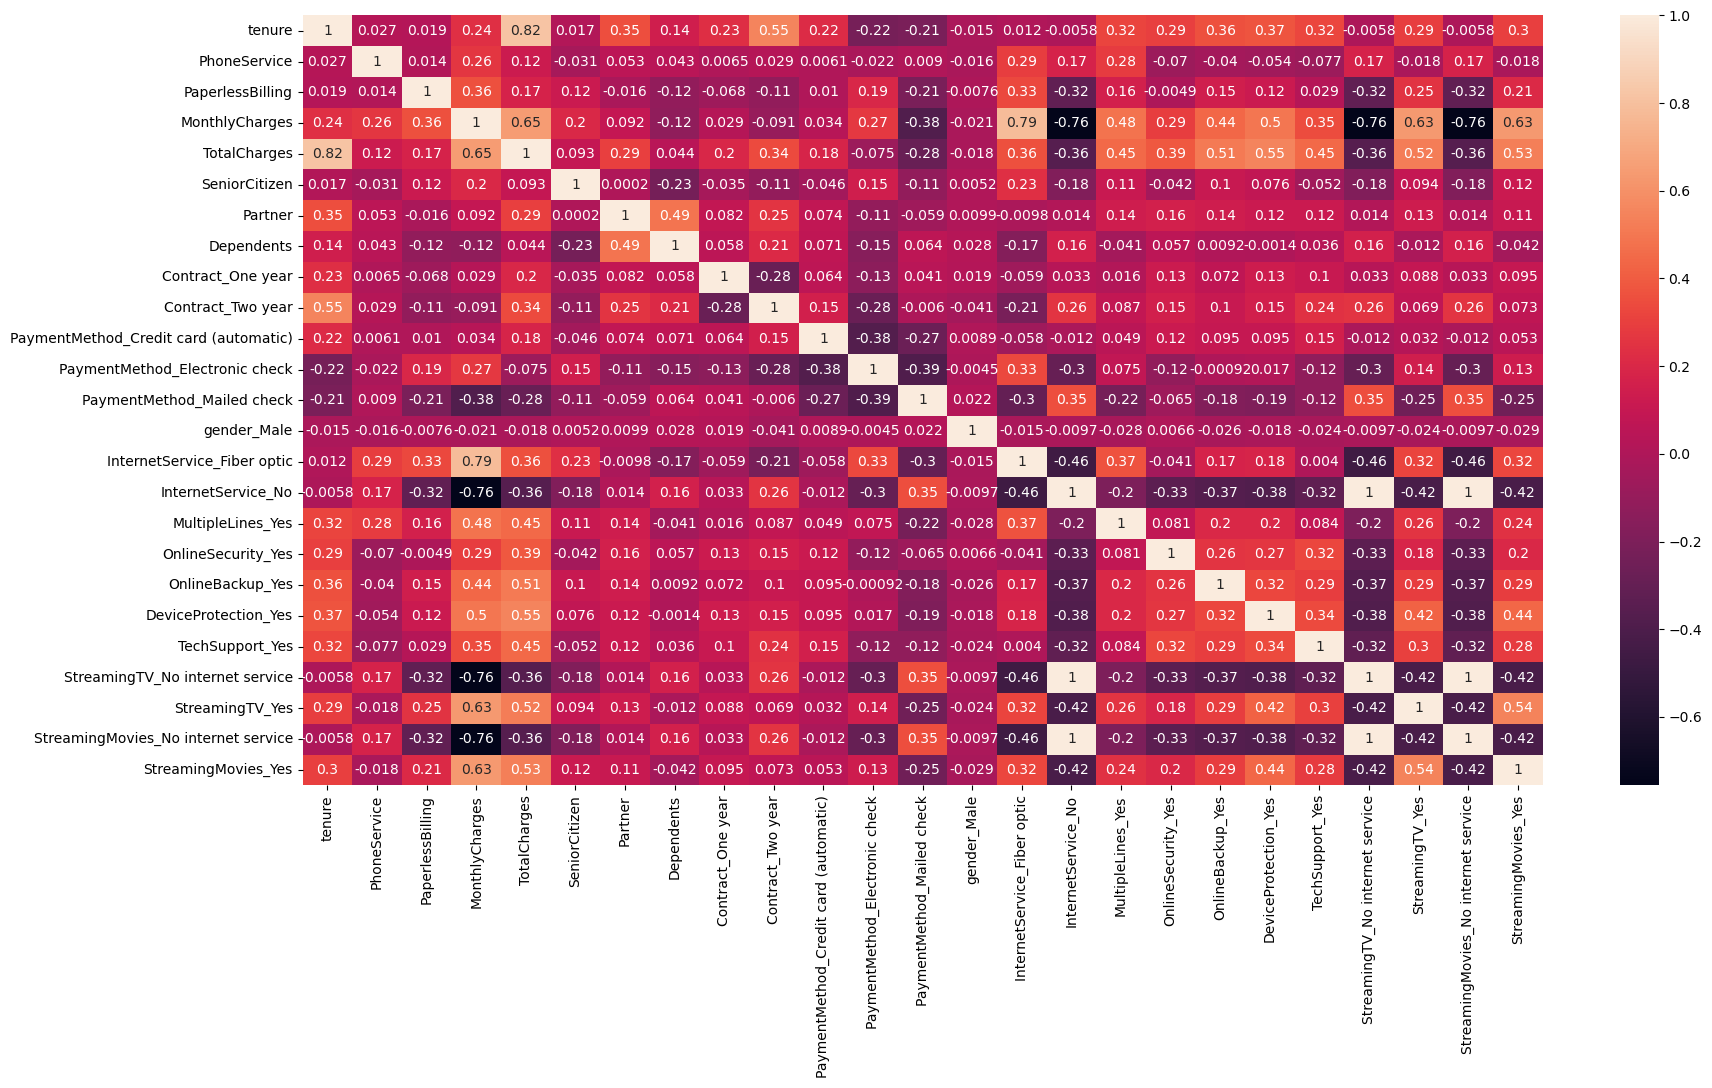

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(X_test.corr(),annot=True)
plt.show()

In [53]:
import statsmodels.api as sm

In [54]:
log1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())

In [55]:
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 31 Jul 2023   Deviance:                       4009.4
Time:                        18:25:21   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.9264      0.327     -2.831      0.005      -1.568      -0.285
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_No internet service          -0.9264      0.327     -2.831      0.005      -1.568      -0.285
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_No internet service      -0.9264      0.327     -2.831      0.005      -1.568      -0.285
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========

In [56]:
from sklearn.linear_model import LogisticRegression


In [57]:
logs=LogisticRegression()

In [58]:
from sklearn.feature_selection import RFE

In [59]:
rfe=RFE(logs,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [60]:
rfe.support_

array([ True, False, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True])

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 6),
 ('PaperlessBilling', False, 2),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 8),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 5),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 10),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 4),
 ('OnlineBackup_Yes', False, 7),
 ('DeviceProtection_Yes', False, 11),
 ('TechSupport_Yes', False, 3),
 ('StreamingTV_No internet service', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No internet service', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [62]:
col=X_train.columns[rfe.support_]

In [63]:
col

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
      dtype='object')

In [64]:
log2=sm.GLM(y_train,sm.add_constant(X_train[col]),family=sm.families.Binomial())

In [65]:
res=log2.fit()

In [66]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.8
Date:                Mon, 31 Jul 2023   Deviance:                       4041.6
Time:                        18:25:22   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2797
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2218      0.164    -13.559      0.000      -2.543      -1.901
tenure                                   -1.5388      0.186     -8.257      0.000      -1.904      -1.174
MonthlyCharges                           -1.1395      0.185     -6.173      0.000      -1.501      -0.778
TotalCharges                              0.7223      0.197      3.673      0.000       0.337       1.108
SeniorCitizen                             0.4614      0.099      4.655      0.000       0.267       0.656
Contract_One year                        -0.7326      0.127     -5.769      0.000      -0.981      -0.484
Contract_Two year                        -1.4007      0.208     -6.722      0.000      -1.809      -0.992
PaymentMethod_Credit card (automatic)    -0.3790      0.112     -3.376      0.001      -0.599      -0.159
PaymentMethod_Mailed check               -0.4083      0.111     -3.690      0.000      -0.625      -0.191
InternetService_Fiber optic               1.8340      0.198      9.276      0.000       1.446       2.221
InternetService_No                       -0.6052      0.071     -8.533      0.000      -0.744      -0.466
MultipleLines_Yes                         0.4351      0.102      4.268      0.000       0.235       0.635
StreamingTV_No internet service          -0.6052      0.071     -8.533      0.000      -0.744      -0.466
StreamingTV_Yes                           0.6440      0.111      5.776      0.000       0.425       0.863
StreamingMovies_No internet service      -0.6052      0.071     -8.533      0.000      -0.744      -0.466
StreamingMovies_Yes                       0.5260      0.109      4.806      0.000       0.311       0.740
=========================================================================================================
"""

In [67]:
#Predicting the values on the train set
y_train_prediction=res.predict(sm.add_constant(X_train[col]))

In [68]:
y_train_prediction

879     0.163642
5790    0.254667
6498    0.556098
880     0.520664
2784    0.670002
          ...   
79      0.012547
3934    0.165693
5964    0.051779
6947    0.112101
5649    0.035696
Length: 4922, dtype: float64

In [69]:
# CREATE A DATAFRAME WITH ACTUAL CHURN FLAG AND THE PREDICTED PROBABILITIES
y_train_pred_final=pd.DataFrame({"Churn":y_train.values,"Churn Probability":y_train_prediction})
y_train_pred_final["CustID"]=y_train.index
y_train_pred_final

,Churn,Churn Probability,CustID
879,0,0.163642,879
5790,0,0.254667,5790
6498,1,0.556098,6498
880,1,0.520664,880
2784,1,0.670002,2784
...,...,...,...
79,0,0.012547,79
3934,0,0.165693,3934
5964,0,0.051779,5964
6947,0,0.112101,6947


In [70]:
# CREATING A new column "PREDICTED" wherein the if the churn probability > 0.5 the predicted is 1 and churn probability < 0.5 then the predicted is 0
y_train_pred_final['Predicted']=y_train_pred_final["Churn Probability"].map(lambda x:1 if x>0.5 else 0)

In [71]:
y_train_pred_final

,Churn,Churn Probability,CustID,Predicted
879,0,0.163642,879,0
5790,0,0.254667,5790,0
6498,1,0.556098,6498,1
880,1,0.520664,880,1
2784,1,0.670002,2784,1
...,...,...,...,...
79,0,0.012547,79,0
3934,0,0.165693,3934,0
5964,0,0.051779,5964,0
6947,0,0.112101,6947,0


In [72]:
from sklearn import metrics

In [73]:
# Confusion matrix
metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Predicted)

array([[3276,  359],
       [ 596,  691]], dtype=int64)

In [74]:
# Confusion matrix
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Predicted)

0.8059731816334823

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)


In [77]:
col=col.drop(["InternetService_No","StreamingTV_No internet service","StreamingMovies_No internet service"])

In [78]:
vif

,Features,VIF
9,InternetService_No,inf
11,StreamingTV_No internet service,inf
13,StreamingMovies_No internet service,inf
1,MonthlyCharges,13.74
2,TotalCharges,10.36
0,tenure,7.31
8,InternetService_Fiber optic,4.57
5,Contract_Two year,2.82
12,StreamingTV_Yes,2.64
14,StreamingMovies_Yes,2.64


In [79]:
col=col.drop("TotalCharges")

In [80]:
# Lets re run the model using the variables
X_train_sm=sm.add_constant(X_train[col])
log3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
ress=log3.fit()

In [81]:
ress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2060.7
Date:                Mon, 31 Jul 2023   Deviance:                       4121.4
Time:                        18:25:22   Pearson chi2:                 5.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2679
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6927      0.148    -11.461      0.000      -1.982      -1.403
tenure                                   -0.9579      0.065    -14.670      0.000      -1.086      -0.830
MonthlyCharges                            0.1010      0.118      0.854      0.393      -0.131       0.333
SeniorCitizen                             0.5327      0.099      5.377      0.000       0.339       0.727
Contract_One year                        -0.8780      0.124     -7.082      0.000      -1.121      -0.635
Contract_Two year                        -1.5996      0.203     -7.870      0.000      -1.998      -1.201
PaymentMethod_Credit card (automatic)    -0.4173      0.112     -3.735      0.000      -0.636      -0.198
PaymentMethod_Mailed check               -0.4887      0.107     -4.585      0.000      -0.698      -0.280
InternetService_Fiber optic               0.9500      0.164      5.809      0.000       0.629       1.271
MultipleLines_Yes                         0.2022      0.096      2.108      0.035       0.014       0.390
StreamingTV_Yes                           0.3632      0.106      3.420      0.001       0.155       0.571
StreamingMovies_Yes                       0.2680      0.105      2.553      0.011       0.062       0.474
=========================================================================================================
"""

In [82]:
y_train_predd=ress.predict(X_train_sm).values.reshape(-1)

In [83]:
y_train_pred_final["Churn Probability"]=y_train_predd

In [84]:
y_train_pred_final

,Churn,Churn Probability,CustID,Predicted
879,0,0.176034,879,0
5790,0,0.197677,5790,0
6498,1,0.633727,6498,1
880,1,0.715234,880,1
2784,1,0.753100,2784,1
...,...,...,...,...
79,0,0.032155,79,0
3934,0,0.094351,3934,0
5964,0,0.087278,5964,0
6947,0,0.077981,6947,0


In [85]:
y_train_pred_final["Predicted"]=y_train_pred_final['Churn Probability'].map(lambda x:1 if x>0.5 else 0)

In [86]:
metrics.accuracy_score(y_train_pred_final["Churn"],y_train_pred_final['Predicted'])

0.8006907761072735

In [87]:
confusion=metrics.confusion_matrix(y_train_pred_final["Churn"],y_train_pred_final['Predicted'])

In [88]:
 confusion

array([[3287,  348],
       [ 633,  654]], dtype=int64)

In [89]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [90]:
#Sensitivity which is the the total no of actual yeses predicted by the  
TP/float(FN+TP)

0.5081585081585082

In [91]:
FP/float(FP+TN)

0.09573590096286107

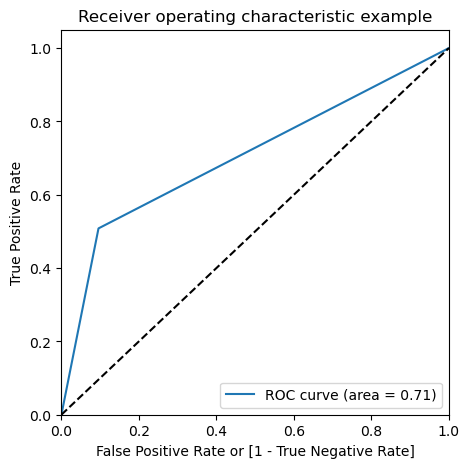

In [92]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Predicted)

In [93]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Churn Probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn Probability,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.176034,879,0,1,1,0,0,0,0,0,0,0,0
5790,0,0.197677,5790,0,1,1,0,0,0,0,0,0,0,0
6498,1,0.633727,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.715234,880,1,1,1,1,1,1,1,1,1,0,0
2784,1,0.753100,2784,1,1,1,1,1,1,1,1,1,0,0


In [94]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.603616  0.945610  0.482531
0.2   0.2  0.697074  0.880342  0.632187
0.3   0.3  0.765949  0.732712  0.777717
0.4   0.4  0.791345  0.620824  0.851719
0.5   0.5  0.800691  0.508159  0.904264
0.6   0.6  0.799065  0.381507  0.946905
0.7   0.7  0.773466  0.192696  0.979092
0.8   0.8  0.746648  0.037296  0.997799
0.9   0.9  0.738521  0.000000  1.000000


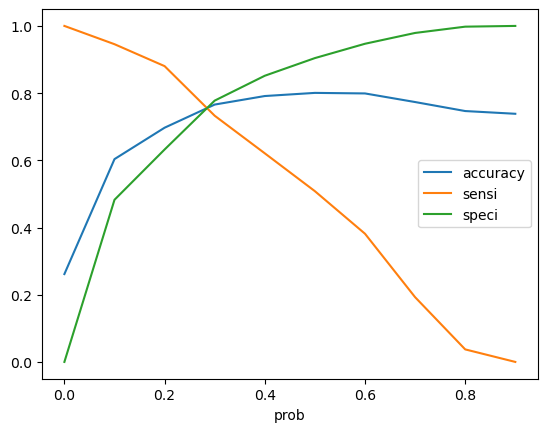

In [95]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [96]:
cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )

In [97]:
cm1

array([[3635,    0],
       [1287,    0]], dtype=int64)

In [98]:
y_train_pred_final.Churn

879     0
5790    0
6498    1
880     1
2784    1
       ..
79      0
3934    0
5964    0
6947    0
5649    0
Name: Churn, Length: 4922, dtype: int64

In [99]:
y_train_pred_final[i] 

879     0
5790    0
6498    0
880     0
2784    0
       ..
79      0
3934    0
5964    0
6947    0
5649    0
Name: 0.9, Length: 4922, dtype: int64

In [100]:
y_train_pred_final

,Churn,Churn Probability,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.176034,879,0,1,1,0,0,0,0,0,0,0,0
5790,0,0.197677,5790,0,1,1,0,0,0,0,0,0,0,0
6498,1,0.633727,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.715234,880,1,1,1,1,1,1,1,1,1,0,0
2784,1,0.753100,2784,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0.032155,79,0,1,0,0,0,0,0,0,0,0,0
3934,0,0.094351,3934,0,1,0,0,0,0,0,0,0,0,0
5964,0,0.087278,5964,0,1,0,0,0,0,0,0,0,0,0
6947,0,0.077981,6947,0,1,0,0,0,0,0,0,0,0,0


In [101]:
y_train_prediction

879     0.163642
5790    0.254667
6498    0.556098
880     0.520664
2784    0.670002
          ...   
79      0.012547
3934    0.165693
5964    0.051779
6947    0.112101
5649    0.035696
Length: 4922, dtype: float64

In [102]:
#Building the model with keeping the cut-off as 0.3 which was 0.5 
y_train_predicted_final=pd.DataFrame({'Churn':y_train.values,'Churn_Probability':y_train_prediction})
y_train_predicted_final['Customer ID']=y_train.index


In [103]:
y_train_predicted_final

,Churn,Churn_Probability,Customer ID
879,0,0.163642,879
5790,0,0.254667,5790
6498,1,0.556098,6498
880,1,0.520664,880
2784,1,0.670002,2784
...,...,...,...
79,0,0.012547,79
3934,0,0.165693,3934
5964,0,0.051779,5964
6947,0,0.112101,6947


In [104]:
y_train_predicted_final['Prediction']=y_train_predicted_final['Churn_Probability'].map(lambda x:1 if x>0.3 else 0)

In [105]:
y_train_predicted_final.head()

,Churn,Churn_Probability,Customer ID,Prediction
879,0,0.163642,879,0
5790,0,0.254667,5790,0
6498,1,0.556098,6498,1
880,1,0.520664,880,1
2784,1,0.670002,2784,1


In [106]:
metrics.accuracy_score(y_train_predicted_final.Churn,y_train_predicted_final.Prediction)

0.7700121901665989

In [107]:
cm2=metrics.confusion_matrix(y_train_predicted_final.Churn,y_train_predicted_final.Prediction)

In [108]:
cm2

array([[2781,  854],
       [ 278, 1009]], dtype=int64)

In [109]:
(cm2[1,1])/(cm2[1,1]+cm2[1,0])

0.7839937839937839

In [110]:
cm2

array([[2781,  854],
       [ 278, 1009]], dtype=int64)

In [111]:
# PRECISION

(cm2[1,1])/(cm2[0,1]+cm2[1,1])

0.5415995705850778

In [112]:
# RECALL 

(cm2[1,1])/(cm2[1,1]+cm2[1,0])

0.7839937839937839

In [113]:
from sklearn.metrics import precision_recall_curve

In [114]:
y_train_predicted_final['Prediction']

879     0
5790    0
6498    1
880     1
2784    1
       ..
79      0
3934    0
5964    0
6947    0
5649    0
Name: Prediction, Length: 4922, dtype: int64

In [115]:
y_train_predicted_final["Churn"]

879     0
5790    0
6498    1
880     1
2784    1
       ..
79      0
3934    0
5964    0
6947    0
5649    0
Name: Churn, Length: 4922, dtype: int64

In [116]:
precision,recall,thresholds=precision_recall_curve(y_train_predicted_final['Prediction'],y_train_predicted_final["Churn"])

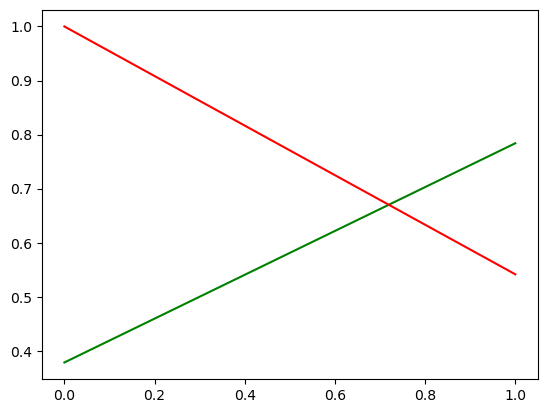

In [117]:
plt.plot(thresholds,precision[:-1],"g-")
plt.plot(thresholds,recall[:-1],"r-")
plt.show()

In [118]:
# PREDICTION ON THE TEST SET

In [119]:
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [120]:
col

Index(['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [121]:
X_test

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
942,-0.347623,1,1,0.499951,-0.128378,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3730,0.999203,1,1,1.319685,1.600302,0,1,0,0,0,...,0,1,0,1,1,0,0,1,0,1
1761,1.040015,1,1,-1.342374,-0.343297,0,0,0,0,1,...,1,1,0,0,0,0,1,0,1,0
2283,-1.286319,1,1,0.223935,-0.979170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1872,0.346196,1,0,-1.500335,-0.656086,0,1,1,0,1,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1.244080,1,0,0.132483,0.802182,0,0,0,1,0,...,0,1,1,1,1,1,0,0,0,0
3508,1.529770,1,1,1.623968,2.490097,0,0,0,0,1,...,0,1,1,1,1,1,0,1,0,1
6765,1.488957,1,1,-1.304131,-0.272833,0,1,1,0,1,...,1,1,0,0,0,0,1,0,1,0
3598,-1.286319,1,0,-0.615753,-0.990304,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
X_test[col]

,tenure,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,0.499951,0,0,0,1,0,1,0,0,1
3730,0.999203,1.319685,0,0,0,1,0,1,1,1,1
1761,1.040015,-1.342374,0,0,1,1,0,0,1,0,0
2283,-1.286319,0.223935,0,0,0,0,1,1,0,0,0
1872,0.346196,-1.500335,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1289,1.244080,0.132483,0,1,0,0,0,0,1,0,0
3508,1.529770,1.623968,0,0,1,0,0,1,1,1,1
6765,1.488957,-1.304131,0,0,1,0,0,0,1,0,0
3598,-1.286319,-0.615753,1,0,0,0,0,0,0,0,0


In [123]:
X_test=X_test[col]

In [124]:
X_test

,tenure,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,0.499951,0,0,0,1,0,1,0,0,1
3730,0.999203,1.319685,0,0,0,1,0,1,1,1,1
1761,1.040015,-1.342374,0,0,1,1,0,0,1,0,0
2283,-1.286319,0.223935,0,0,0,0,1,1,0,0,0
1872,0.346196,-1.500335,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1289,1.244080,0.132483,0,1,0,0,0,0,1,0,0
3508,1.529770,1.623968,0,0,1,0,0,1,1,1,1
6765,1.488957,-1.304131,0,0,1,0,0,0,1,0,0
3598,-1.286319,-0.615753,1,0,0,0,0,0,0,0,0


In [125]:
X_test_sm=sm.add_constant(X_test)

In [126]:
X_test_sm

,const,tenure,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,1.0,-0.347623,0.499951,0,0,0,1,0,1,0,0,1
3730,1.0,0.999203,1.319685,0,0,0,1,0,1,1,1,1
1761,1.0,1.040015,-1.342374,0,0,1,1,0,0,1,0,0
2283,1.0,-1.286319,0.223935,0,0,0,0,1,1,0,0,0
1872,1.0,0.346196,-1.500335,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1.0,1.244080,0.132483,0,1,0,0,0,0,1,0,0
3508,1.0,1.529770,1.623968,0,0,1,0,0,1,1,1,1
6765,1.0,1.488957,-1.304131,0,0,1,0,0,0,1,0,0
3598,1.0,-1.286319,-0.615753,1,0,0,0,0,0,0,0,0


In [127]:
y_test_pred=ress.predict(X_test_sm)

In [128]:
y_test_pred.head()

942     0.375546
3730    0.240410
1761    0.009574
2283    0.505850
1872    0.022416
dtype: float64

In [129]:
y_pred_1=pd.DataFrame(y_test_pred)

In [130]:
y_pred_1.head()

,0
942,0.375546
3730,0.240410
1761,0.009574
2283,0.505850
1872,0.022416


In [131]:
y_test

942     0
3730    1
1761    0
2283    1
1872    0
       ..
1289    0
3508    0
6765    0
3598    0
4987    0
Name: Churn, Length: 2110, dtype: int64

In [132]:
y_test_df=pd.DataFrame(y_test)

In [133]:
y_test_df

,Churn
942,0
3730,1
1761,0
2283,1
1872,0
...,...
1289,0
3508,0
6765,0
3598,0


In [134]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [135]:
y_test_df

,Churn
0,0
1,1
2,0
3,1
4,0
...,...
2105,0
2106,0
2107,0
2108,0


In [136]:
y_test_df["CustID"]=y_test_df.index

In [137]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [138]:
y_pred_final.head()

,Churn,CustID,0
0,0,0,0.375546
1,1,1,0.240410
2,0,2,0.009574
3,1,3,0.505850
4,0,4,0.022416


In [139]:
y_pred_final=y_pred_final.rename(columns={0:'Churn_Probability'})

In [140]:
y_pred_final=y_pred_final.reindex(['Churn','CustID','Churn_Probability'],axis=1)

In [141]:
y_pred_final.head()

,Churn,CustID,Churn_Probability
0,0,0,0.375546
1,1,1,0.240410
2,0,2,0.009574
3,1,3,0.505850
4,0,4,0.022416


In [142]:
y_pred_final['final_predicted']=y_pred_final['Churn_Probability'].map(lambda x:1 if x> 0.42 else 0)

In [143]:
y_pred_final.head()

,Churn,CustID,Churn_Probability,final_predicted
0,0,0,0.375546,0
1,1,1,0.240410,0
2,0,2,0.009574,0
3,1,3,0.505850,1
4,0,4,0.022416,0


In [145]:
metrics.accuracy_score(y_pred_final['Churn'],y_pred_final['final_predicted'])

0.7744075829383886

In [149]:
confusion2=metrics.confusion_matrix(y_pred_final['Churn'],y_pred_final['final_predicted'])

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# SENSITIVITY
TP/float(TP+FN)

0.5738831615120275

In [152]:
#SPECIFICITY
TN/float(TN+FP)

0.8507853403141361